In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_contract = pd.read_csv('/Users/owner/Downloads/final_provider/contract.csv')
df_internet = pd.read_csv('/Users/owner/Downloads/final_provider/internet.csv')
df_personal = pd.read_csv('/Users/owner/Downloads/final_provider/personal.csv')
df_phone = pd.read_csv('/Users/owner/Downloads/final_provider/phone.csv')

#df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
#df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
#df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
#df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_contract['BeginDate'].value_counts()

BeginDate
2014-02-01    366
2019-11-01    237
2019-09-01    237
2019-10-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: count, Length: 77, dtype: int64

In [5]:
df_contract['customerID'].value_counts()

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
4501-VCPFK    1
6075-SLNIL    1
             ..
1452-KIOVK    1
6713-OKOMC    1
7892-POOKP    1
6388-TABGU    1
9763-GRSKD    1
Name: count, Length: 7043, dtype: int64

In [6]:
len(df_contract[df_contract['EndDate'] == 'No']) / len(df_contract['EndDate'])

0.7346301292063041

In [7]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [8]:
df_internet['OnlineSecurity'].value_counts()

OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64

In [9]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [10]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [11]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [12]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [13]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


# Workplan

Our client, Interconnect, is a telecom provider that wants to forecast the churn rate for its list of clients and has provided 4 datasets of information in order to create a model or models that will be able to predict whether a client is likely to churn.

In our data, we have access to the customers information via the CustomerID column in the personal dataframe which is 7043 customers. Our internet dataset shows 5517 CustomerIDs. After reviewing the datasets individually it looks like there is a large quantity of customers that have CustomerIDs but are missing information as to what services were purchased. In total it looks as though ~1500 customers have missing data in this way which needs to be addressed. For our purposes, we will assume these customers did not purchase the items listed in the internet dataset instead of removing them from our data. 

Preprossessing Tasks:
- Check for missing values
- Need to correct column names to lowercase and underscore
- Change datatypes for dates to datetime
- Check and change other datatypes to necessary datatypes

Feature Engineering Tasks:
- Check and change categorical data columns using one hot encoding (e.g. PaymentMethod)
- Create a new column that lists if a client has churned (using EndDate column)
- Create a duration column
- Split and balance data

Our plan will be:

1. Merge the data into one full dataset
2. Perform all prepossing tasks
3. Feature engineering for our model
4. Split our data into training, testing, and validation subsets
5. Determine which model(s) will likely be best suited given the business issue
6. Create and train our model(s) and determine initial accuracy based on auc-roc and accuracy within the validation set of data
7. Tune hyperparameters of our model(s) to improve accuracy
8. Choose the best performing model and test against our test set
9. Achieve an auc-roc score above the threshold (>0.86)

## Merge Data

In [14]:
df_final = pd.merge(df_contract, df_internet, on='customerID', how='outer')

In [15]:
df_final = pd.merge(df_final, df_personal, on='customerID', how='outer')

In [16]:
df_final = pd.merge(df_final, df_phone, on='customerID', how='outer')

In [17]:
df_final.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


## Preprocessing

### Address missing values

In [19]:
df_final.isnull().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
dtype: int64

In [20]:
columns_to_fill = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

In [21]:
df_final[columns_to_fill] = df_final[columns_to_fill].fillna('No')

In [22]:
df_final['MultipleLines'].value_counts()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

In [23]:
df_final.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
dtype: int64

As noted in the work plan, the missing values in our data are all columns that are binary classifications. We have replaced the missing values with the assumption that these customer did not buy the services listed in the internet plan.

### Change columns names 

In [24]:
#convert column names to lower case and seperate by _
df_final.columns = df_final.columns.str.replace('([a-z])([A-Z])', r'\1_\2', regex=True).str.lower()

In [25]:
df_final.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


### Convert date columns to datetime

In [26]:
#convert begin_date to datetime
df_final['begin_date'] = pd.to_datetime(df_final['begin_date'])

In [27]:
#convert end_date to datetime
df_final['end_date'] = pd.to_datetime(df_final['end_date'], errors='coerce').fillna('active')

/var/folders/gx/hh77p2dn1vbgklhl13scdw1w0000gn/T/ipykernel_50772/1990346271.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_final['end_date'] = pd.to_datetime(df_final['end_date'], errors='coerce').fillna('active')


In [28]:
df_final['end_date'].value_counts()

end_date
active                 5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: count, dtype: int64

### Change nominal columns to numeric datatype

In [29]:
nom_cols = ['multiple_lines', 'senior_citizen', 'partner', 'dependents', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']

In [30]:
#Change nominal cols to 1 or 0
df_final[nom_cols] = df_final[nom_cols].replace({'Yes': 1, 'No':0})

In [31]:
df_final.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,active,Month-to-month,1,Electronic check,29.85,29.85,DSL,0,1,0,0,0,0,Female,0,1,0,0
1,5575-GNVDE,2017-04-01,active,One year,0,Mailed check,56.95,1889.5,DSL,1,0,1,0,0,0,Male,0,0,0,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,DSL,1,1,0,0,0,0,Male,0,0,0,0
3,7795-CFOCW,2016-05-01,active,One year,0,Bank transfer (automatic),42.30,1840.75,DSL,1,0,1,1,0,0,Male,0,0,0,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,Fiber optic,0,0,0,0,0,0,Female,0,0,0,0


### Visualization

In [32]:
numerical_cols = ['monthly_charges', 'total_charges']

In [33]:
df_final['total_charges'] = df_final['total_charges'].replace(' ', np.nan)

In [34]:
df_final['total_charges'] = pd.to_numeric(df_final['total_charges'], errors='coerce')

In [35]:
df_final['total_charges'] = df_final['total_charges'].fillna(df_final['total_charges'].mean())

In [36]:
df_final['total_charges'].isnull().sum()

0

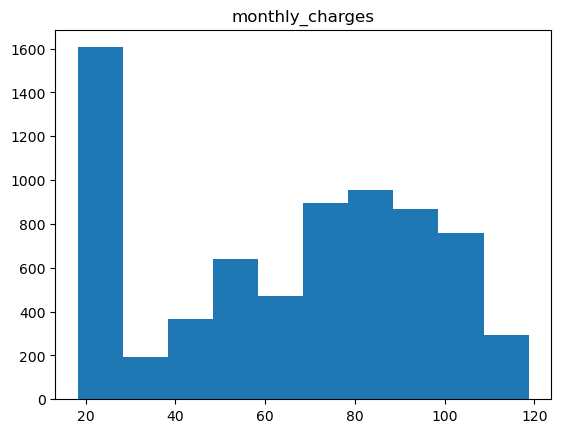

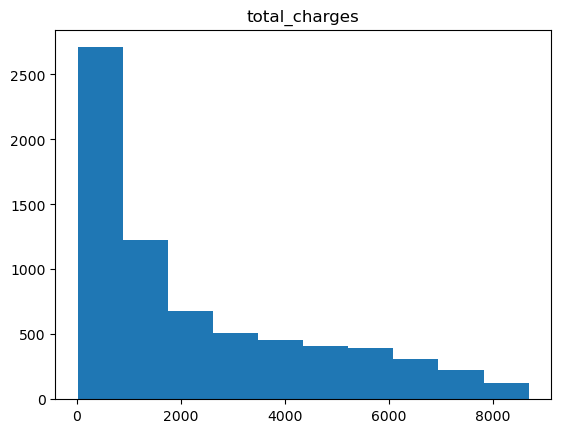

In [37]:
for col in numerical_cols:
    plt.hist(df_final[col])
    plt.title(f"{col}")
    plt.show()

Our preprocessing steps have configured our existing datatypes to workable numeric datatypes. We changes the naming format for columns to be lower case, we addressed our missing values, we converted our dates to datetime datatypes, we identified our nominal columns and changed the values from 'yes' or 'no' to 1 or 0, and finally we ploted our monthly charges and total charges on a histogram to have insight into the distribution of the data. With the data seemingly manageable at this point, we can proceed with our feature engineering.

## Feature Engineering

### One-Hot Encoding

In [38]:
#df_final['type'].value_counts()
#make ordinal 0 1 2

In [39]:
df_final['payment_method'].value_counts()

payment_method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [40]:
df_final['internet_service'].value_counts()

internet_service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [41]:
ohe_cols = ['payment_method', 'internet_service', 'gender', 'type']

In [42]:
ohe_df = pd.get_dummies(df_final[ohe_cols])

In [43]:
ohe_df.head()

,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,internet_service_DSL,internet_service_Fiber optic,internet_service_No,gender_Female,gender_Male,type_Month-to-month,type_One year,type_Two year
0,False,False,True,False,True,False,False,True,False,True,False,False
1,False,False,False,True,True,False,False,False,True,False,True,False
2,False,False,False,True,True,False,False,False,True,True,False,False
3,True,False,False,False,True,False,False,False,True,False,True,False
4,False,False,True,False,False,True,False,True,False,True,False,False


In [44]:
non_ohe_df = df_final.loc[:,~df_final.columns.isin(ohe_cols)]

In [45]:
df_final = pd.concat([ohe_df, non_ohe_df],axis=1)

In [46]:
df_final.head()

,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,internet_service_DSL,internet_service_Fiber optic,internet_service_No,gender_Female,gender_Male,type_Month-to-month,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,senior_citizen,partner,dependents,multiple_lines
0,False,False,True,False,True,False,False,True,False,True,...,0,1,0,0,0,0,0,1,0,0
1,False,False,False,True,True,False,False,False,True,False,...,1,0,1,0,0,0,0,0,0,0
2,False,False,False,True,True,False,False,False,True,True,...,1,1,0,0,0,0,0,0,0,0
3,True,False,False,False,True,False,False,False,True,False,...,1,0,1,1,0,0,0,0,0,0
4,False,False,True,False,False,True,False,True,False,True,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   payment_method_Bank transfer (automatic)  7043 non-null   bool          
 1   payment_method_Credit card (automatic)    7043 non-null   bool          
 2   payment_method_Electronic check           7043 non-null   bool          
 3   payment_method_Mailed check               7043 non-null   bool          
 4   internet_service_DSL                      7043 non-null   bool          
 5   internet_service_Fiber optic              7043 non-null   bool          
 6   internet_service_No                       7043 non-null   bool          
 7   gender_Female                             7043 non-null   bool          
 8   gender_Male                               7043 non-null   bool          
 9   type_Month-to-month           

### Create Churn Column

In [48]:
df_final['churn'] = df_final['end_date'].apply(lambda x: 1 if x != 'active' else 0)

### Create Duration Column

In [49]:
service_length = []
for index,row in df_final.iterrows():
    if row['end_date'] == 'active':
        service_length.append((datetime.strptime('1/1/2020', '%m/%d/%Y') - row['begin_date']).days)
    else:
        service_length.append((row['end_date'] - row['begin_date']).days)

In [50]:
df_final['service_length'] = service_length

In [51]:
df_final.head()

,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,internet_service_DSL,internet_service_Fiber optic,internet_service_No,gender_Female,gender_Male,type_Month-to-month,...,device_protection,tech_support,streaming_tv,streaming_movies,senior_citizen,partner,dependents,multiple_lines,churn,service_length
0,False,False,True,False,True,False,False,True,False,True,...,0,0,0,0,0,1,0,0,0,0
1,False,False,False,True,True,False,False,False,True,False,...,1,0,0,0,0,0,0,0,0,1005
2,False,False,False,True,True,False,False,False,True,True,...,0,0,0,0,0,0,0,0,1,61
3,True,False,False,False,True,False,False,False,True,False,...,1,1,0,0,0,0,0,0,0,1340
4,False,False,True,False,False,True,False,True,False,True,...,0,0,0,0,0,0,0,0,1,61


### Correlation Matrix

In [52]:
num_cols = ['service_length', 'monthly_charges', 'total_charges', 'churn']

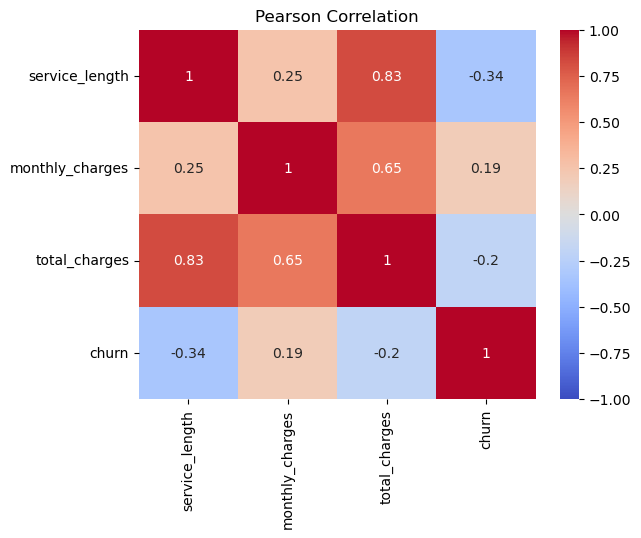

In [53]:
corr_matrix = df_final[num_cols].corr(method='pearson')

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation')
plt.show()

In [54]:
internet_list = ['internet_service_DSL', 'internet_service_Fiber optic', 'internet_service_No', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'churn']

### Train Test Split

In [55]:
df_final = df_final.drop(columns=['total_charges'])

In [56]:
df_temp, df_test = train_test_split(df_final, test_size=0.20, random_state=42, stratify=df_final['churn'])

In [57]:
df_train, df_valid = train_test_split(df_temp, test_size=0.25, random_state=42, stratify=df_temp['churn'])

In [58]:
print('Training dataset: ', df_train.shape)
print('Testing dataset: ', df_test.shape)
print('Validation dataset: ', df_valid.shape)

X = df_temp.drop(columns=['churn', 'customer_id', 'begin_date', 'end_date'])
y = df_temp['churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42, stratify=df_temp['churn'])

Training dataset:  (4225, 29)
Testing dataset:  (1409, 29)
Validation dataset:  (1409, 29)


In [59]:
X_train.shape

(4225, 25)

In [60]:
df_train.columns

Index(['payment_method_Bank transfer (automatic)',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'internet_service_DSL', 'internet_service_Fiber optic',
       'internet_service_No', 'gender_Female', 'gender_Male',
       'type_Month-to-month', 'type_One year', 'type_Two year', 'customer_id',
       'begin_date', 'end_date', 'paperless_billing', 'monthly_charges',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'senior_citizen', 'partner',
       'dependents', 'multiple_lines', 'churn', 'service_length'],
      dtype='object')

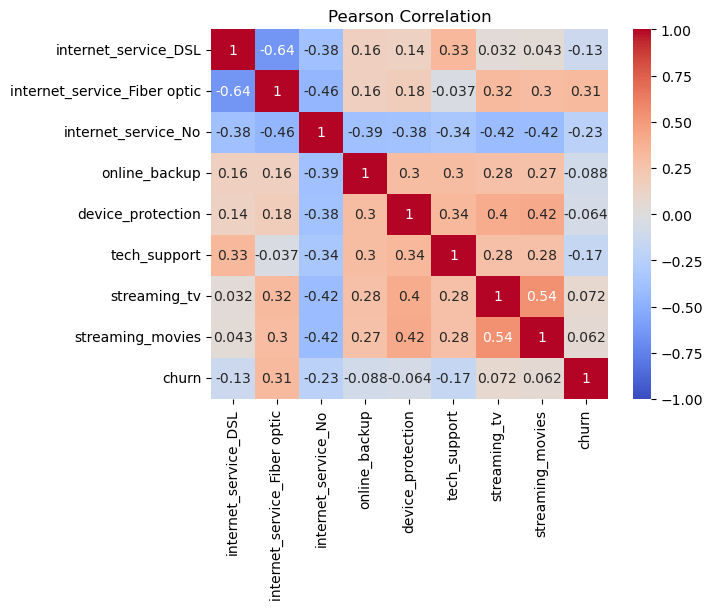

In [61]:
corr_matrix = df_train[internet_list].corr(method='pearson')

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation')
plt.show()

Feature Engineering is the process of using our data to create the features necessary to ensure our model can make accurate predictions. Some questions that we asked are:

Can we create new features that will impact our efficacy using the features we currently have?
How are the features correlated with each other?
What do we want our final set of features to be for machine learning?

To start, we identified which columns were candidates for One Hot Encoding to make sure that our final dataset had numeric values only. We converted these columns using OHE and confirmed that all the columns were in the necessary boolean datatype. Next, we determined that 2 additional features could be created and used in our model. These new columns were 'churn' column which will be used as our target and denotes whether a customer is likely to churn and a 'duration' column which tells us how many days a customer has been with the company. The final step in feature engineering is to see whether features are strongly correlated to each other to ensure that there is no redundancy which we visualize in our pearson correlation matracices.

With everything being successful, we split our data into our training and validation subsets.

## Model Determination

The issue we are trying to address with our client is to determine the likelyhood that a customer will churn. This is a classification problem that we will be addressing. Our plan is to try a variety of model types with increasing complexity to see what models have the highest auc-roc score on our training and validation sets, select the top performer, explore hyper parameter tuning to increase accuracy, and finally, determine which model is to be used for testing. Our target for the model is auc-roc of ~0.86

The models we will use are:
1. Logistic Regression
2. Random forest
3. XG Boost

## Model Creation

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [63]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_prob = log_reg.predict_proba(X_valid)[:,1]
log_pred = log_reg.predict(X_valid)

auc_score_log = roc_auc_score(y_valid, log_prob)
log_accuracy = accuracy_score(y_valid, log_pred)

print(f'Logistical Regression AUC-ROC Score: {auc_score_log}')
print(f'Logistical Regression Accuracy: {log_accuracy}')

Logistical Regression AUC-ROC Score: 0.8320300188586635
Logistical Regression Accuracy: 0.8019872249822569


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Result

Logistic Regression performed reasonably well as our least complex model. Our auc-roc score is 0.83 and accuracy score is 0.80. This model performed well and will be considered for final testing.

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_prob = rf_classifier.predict_proba(X_valid)[:,1]
rf_predict = rf_classifier.predict(X_valid)

auc_score_rf = roc_auc_score(y_valid, rf_prob)

rf_accuracy = accuracy_score(y_valid, rf_predict)

print(f'Random Forest AUC-ROC Score: {auc_score_rf}')
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest AUC-ROC Score: 0.8320196853444936
Random Forest Accuracy: 0.7955997161107168


#### Result

Random forest scored as well in auc-roc as logistic regresssion with a score of 0.83 and a slightly lower accuracy score. However, if chosen, random forest would be my preferred model between the two as hyper parameter tuning will have a significanly increased ability to raise our accuracy due to RF's increased conplexity.

### XG Boost

In [66]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [67]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train, y_train)

xg_pred = xgb_classifier.predict(X_valid)
xg_proba = xgb_classifier.predict_proba(X_valid)[:, 1]

auc_score_xg = roc_auc_score(y_valid, xg_proba)
print(f'XG Boost AUC-ROC Score: {auc_score_xg}')

xg_accuracy = accuracy_score(y_valid, xg_pred)
print(f'XG Boost Accuracy: {xg_accuracy}')

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:20:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XG Boost AUC-ROC Score: 0.8554225115606189
XG Boost Accuracy: 0.8147622427253371


#### Result

XG Boost has the highest score both in auc roc and accuracy which is in line with our expectations. With it's increased complexity and higher baseline auc roc score of 0.86 it will be the model that we will move forward with. We will next look to tune our hyperparameters for this model to see if the auc roc and accuracy scores can be increased.

In [69]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator = xgb_classifier, param_grid=param_grid, cv=5, scoring= 'roc_auc', n_jobs= -1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:20:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:20:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:20:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:20:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=2)

In [70]:
print(f" Grid Search best parameters: {grid_search.best_params_}")

 Grid Search best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}


In [71]:
tuned_xgb = grid_search.best_estimator_

In [72]:
xg_pred = tuned_xgb.predict(X_valid)
xg_proba = tuned_xgb.predict_proba(X_valid)[:, 1]

auc_score_tuned = roc_auc_score(y_valid, xg_proba)
print(f'XG Boost AUC-ROC Score: {auc_score_tuned}')

tuned_accuracy = accuracy_score(y_valid, xg_pred)
print(f'XG Boost Accuracy: {tuned_accuracy}')

XG Boost AUC-ROC Score: 0.8653336433387584
XG Boost Accuracy: 0.8204400283889283


#### Result

After hyperparameter tuning we increased our auc roc on the training set by 1% as well as our accuracy by 1%. While it may seem low, this puts our model over our mark for the training dataset. XG Boost will now be tested on our testing dataset

## Model Test

### Split test dataset

In [73]:
X_test = df_test.drop(columns=['churn', 'customer_id', 'begin_date', 'end_date'])
y_test = df_test['churn']

### Fit model to entire training data set (training and validation) with best performing hyperparameters

In [74]:
xgb_final = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, learning_rate= 0.05, max_depth= 3, n_estimators= 150)
xgb_final.fit(X, y)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:20:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Get predictions and measure auc roc score

In [75]:
xg_pred = xgb_final.predict(X_test)
xg_proba = xgb_final.predict_proba(X_test)[:, 1]

auc_score_tuned = roc_auc_score(y_test, xg_proba)
print(f'XG Boost AUC-ROC Score: {auc_score_tuned}')

tuned_accuracy = accuracy_score(y_test, xg_pred)
print(f'XG Boost Accuracy: {tuned_accuracy}')

XG Boost AUC-ROC Score: 0.8653129763104188
XG Boost Accuracy: 0.8168914123491838


### Measure feature importance for further clarity

In [76]:
import xgboost as xgb

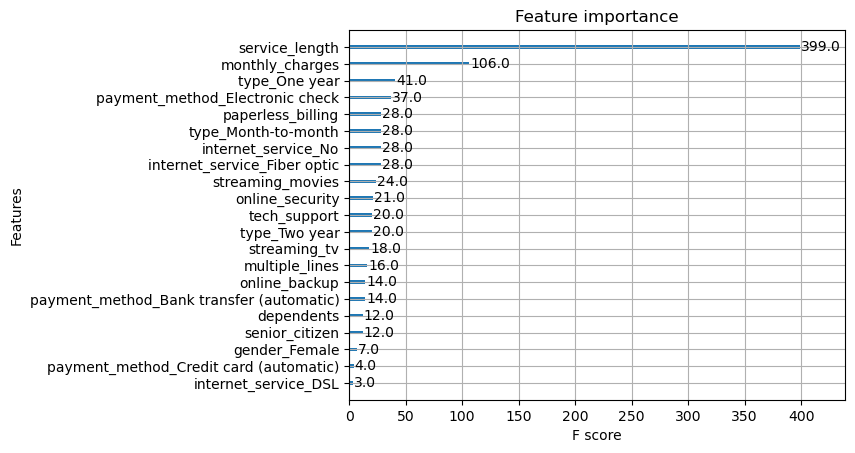

In [77]:
xgb.plot_importance(xgb_final, importance_type= 'weight')
plt.show()

Our XG Boost model performed successfully yileding an auc-roc score of 0.87 and an accuracy of 0.82. This is almost exactly in line with how our model performed in training which means we did not over or underfit our model. Further analysis of our feature importance shows us which features our client may be most interested in prioritizing where in this case service length is by far our most important factor in whether a customer will churn. Additionally monthly charges are also high in making this determination.

This feature importance will be valuable insight to the marketing team to create economic value to Interconnect. By targeting the current customers that meet the critera for churn in our model, efforts can be made to keep customers for churning who meet our estimated churn parameters.